In [ ]:
import lightgbm as lgb
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Import merged data set created at the end of G25_01_Descriptive_Analysis_Cleansing_Preprocessing.ipynb
df_train_merge = pd.read_csv("merged_data.zip")

In [ ]:
# Check all rows of data have been loaded for df_train_merge data set
expected_rows = 19835460
 
if len(df_train_merge) == expected_rows:
  print(f'All {expected_rows} rows of df_train_merge have been imported')
else:
  print(f'WARNING: Only {len(df_train_merge)} rows imported, expected {expected_rows}')

All 19835460 rows of df_train_merge have been imported


In [ ]:
#Code from https://www.kaggle.com/zeynepkurban/ashrae-2/notebook
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [ ]:
df_train_merge = reduce_mem_usage(df_train_merge)

Memory usage after optimization is: 605.33 MB
Decreased by 73.3%


In [ ]:
X_train = df_train_merge

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer

In [ ]:
# Seperate categorical features
categorical_features = ["building_id", "site_id", "meter", "primary_use", "hour", "weekday", "day", "month", "meter_reading", "timestamp"]
# In here, I put meter_readings and timestamp in categorical_features. Of course they are not categoric, I just store them in there.
X_train_categorical = X_train[categorical_features]
X_train_categorical = reduce_mem_usage(X_train_categorical)

# Seperate numerical features
numerical_features = ["air_temperature", "cloud_coverage", "dew_temperature", 
                      "precip_depth_1_hr", "square_feet"]
X_train_numerical = X_train[numerical_features]

#X_train_numerical = reduce_mem_usage(X_train_numerical)

minmaxscaler = MinMaxScaler()
powertransformer = PowerTransformer(method='yeo-johnson', standardize=True)

X_train_numerical = minmaxscaler.fit_transform(X_train_numerical)
X_train_numerical = powertransformer.fit_transform(X_train_numerical)
X_train_numerical = pd.DataFrame(X_train_numerical, columns= numerical_features)

Memory usage after optimization is: 397.25 MB
Decreased by 0.0%


In [ ]:
X_train_categorical = X_train_categorical.reset_index(drop= True)
X_train_numerical = X_train_numerical.reset_index(drop= True)

In [ ]:
X_train = X_train_categorical

X_train["air_temperature"] = X_train_numerical.air_temperature
X_train["cloud_coverage"] = X_train_numerical.cloud_coverage
X_train["dew_temperature"] = X_train_numerical.dew_temperature
X_train["precip_depth_1_hr"] = X_train_numerical.precip_depth_1_hr
X_train["square_feet"] = X_train_numerical.square_feet

In [ ]:
# we copy the X_train which is preprocessed and ready to split. This is important because we will use this dataset later.
dataset_saved = X_train

In [ ]:
df_train_merge_LGBM = X_train

In [ ]:
df_1 = df_train_merge_LGBM[df_train_merge_LGBM.month == 1.0]
y1 = df_1.building_id
X1 = df_1.drop("building_id",1)
df_2 = df_train_merge_LGBM[df_train_merge_LGBM.month == 2.0]
y2 = df_2.building_id
X2 = df_2.drop("building_id",1)
df_3 = df_train_merge_LGBM[df_train_merge_LGBM.month == 3.0]
y3 = df_3.building_id
X3 = df_3.drop("building_id",1)
df_4 = df_train_merge_LGBM[df_train_merge_LGBM.month == 4.0]
y4 = df_4.building_id
X4 = df_4.drop("building_id",1)
df_5 = df_train_merge_LGBM[df_train_merge_LGBM.month == 5.0]
y5 = df_5.building_id
X5 = df_5.drop("building_id",1)
df_6 = df_train_merge_LGBM[df_train_merge_LGBM.month == 6.0]
y6 = df_6.building_id
X6 = df_6.drop("building_id",1)
df_7 = df_train_merge_LGBM[df_train_merge_LGBM.month == 7.0]
y7 = df_7.building_id
X7 = df_7.drop("building_id",1)
df_8 = df_train_merge_LGBM[df_train_merge_LGBM.month == 8.0]
y8 = df_8.building_id
X8 = df_8.drop("building_id",1)
df_9 = df_train_merge_LGBM[df_train_merge_LGBM.month == 9.0]
y9 = df_9.building_id
X9 = df_9.drop("building_id",1)
df_10 = df_train_merge_LGBM[df_train_merge_LGBM.month == 10.0]
y10 = df_10.building_id
X10 = df_10.drop("building_id",1)
df_11 = df_train_merge_LGBM[df_train_merge_LGBM.month == 11.0]
y11 = df_11.building_id
X11 = df_11.drop("building_id",1)
df_12 = df_train_merge_LGBM[df_train_merge_LGBM.month == 12.0]
y12 = df_12.building_id
X12 = df_12.drop("building_id",1)

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42, stratify=y3)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42, stratify=y4)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42, stratify=y5)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.2, random_state=42, stratify=y6)
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.2, random_state=42, stratify=y7)
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.2, random_state=42, stratify=y8)
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=0.2, random_state=42, stratify=y9)
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.2, random_state=42, stratify=y10)
X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y11, test_size=0.2, random_state=42, stratify=y11)
X12_train, X12_test, y12_train, y12_test = train_test_split(X12, y12, test_size=0.2, random_state=42, stratify=y12)

In [ ]:
X1_train = pd.concat([X1_train, y1_train], axis=1, join="inner")
X2_train = pd.concat([X2_train, y2_train], axis=1, join="inner")
X3_train = pd.concat([X3_train, y3_train], axis=1, join="inner")
X4_train = pd.concat([X4_train, y4_train], axis=1, join="inner")
X5_train = pd.concat([X5_train, y5_train], axis=1, join="inner")
X6_train = pd.concat([X6_train, y6_train], axis=1, join="inner")
X7_train = pd.concat([X7_train, y7_train], axis=1, join="inner")
X8_train = pd.concat([X8_train, y8_train], axis=1, join="inner")
X9_train = pd.concat([X9_train, y9_train], axis=1, join="inner")
X10_train = pd.concat([X10_train, y10_train], axis=1, join="inner")
X11_train = pd.concat([X11_train, y11_train], axis=1, join="inner")
X12_train = pd.concat([X12_train, y12_train], axis=1, join="inner")

X1_test = pd.concat([X1_test, y1_test], axis=1, join="inner")
X2_test = pd.concat([X2_test, y2_test], axis=1, join="inner")
X3_test = pd.concat([X3_test, y3_test], axis=1, join="inner")
X4_test = pd.concat([X4_test, y4_test], axis=1, join="inner")
X5_test = pd.concat([X5_test, y5_test], axis=1, join="inner")
X6_test = pd.concat([X6_test, y6_test], axis=1, join="inner")
X7_test = pd.concat([X7_test, y7_test], axis=1, join="inner")
X8_test = pd.concat([X8_test, y8_test], axis=1, join="inner")
X9_test = pd.concat([X9_test, y9_test], axis=1, join="inner")
X10_test = pd.concat([X10_test, y10_test], axis=1, join="inner")
X11_test = pd.concat([X11_test, y11_test], axis=1, join="inner")
X12_test = pd.concat([X12_test, y12_test], axis=1, join="inner")

In [ ]:
train_dataframes = [X1_train, X2_train, X3_train, X4_train, X5_train, X6_train, X7_train, X8_train, X9_train, X10_train, X11_train, X12_train]
test_dataframes = [X1_test, X2_test, X3_test, X4_test, X5_test, X6_test, X7_test, X8_test, X9_test, X10_test, X11_test, X12_test]

X_train = pd.concat(train_dataframes)
X_test = pd.concat(test_dataframes)



y_train = X_train.meter_reading
X_train = X_train.drop("meter_reading",1)

y_test = X_test.meter_reading
X_test = X_test.drop("meter_reading",1)

In [ ]:
df_train_merge_LGBM = reduce_mem_usage(df_train_merge_LGBM)
X_train = reduce_mem_usage(X_train)
X_test = reduce_mem_usage(X_test)

del df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12

del X1_train,X2_train,X3_train,X4_train,X5_train,X6_train,X7_train,X8_train,X9_train,X10_train,X11_train,X12_train

del X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12

Memory usage after optimization is: 586.41 MB
Decreased by 49.2%
Memory usage after optimization is: 529.66 MB
Decreased by 46.2%
Memory usage after optimization is: 132.42 MB
Decreased by 46.2%


In [ ]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
test_timestamp = X_test.timestamp

In [ ]:
X_train = X_train.drop("timestamp",1)
X_test = X_test.drop("timestamp",1)

In [ ]:
# defining parameter range 
# Arrange kfold validation
# It takes too long time (over 2 hours). This is why we didnt use wide parameter range in this model.
# Probably, with better parameters, results might be better

parameters = {'n_estimators': [20,30],
                "learning_rate" : [0.05, 0.01, 0.1],
                "boosting_type": ["gbdt"],
                "num_leaves": [40],
                "reg_alpha": [2]
               }
cv = KFold(n_splits=10, shuffle=True, random_state=42) 

model = GridSearchCV(LGBMRegressor(), parameters, cv=cv, scoring='neg_root_mean_squared_error',
                        return_train_score=True)

model.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state...
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'boosting_type': ['gbdt'],
                         'learning_rate': [0.05, 0.01, 0.1],
         

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))


0.5148754155774315


In [ ]:
# Root Mean Sqaured Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred, squared = False))

1.4531840531388276


In [ ]:
# Mean Squared Error
print(mean_squared_error(y_test, y_pred, squared = True))

2.111743892296991


In [ ]:
# See which parameters we can use with this model
for param in model.get_params().keys():
    print(param)

cv
error_score
estimator__boosting_type
estimator__class_weight
estimator__colsample_bytree
estimator__importance_type
estimator__learning_rate
estimator__max_depth
estimator__min_child_samples
estimator__min_child_weight
estimator__min_split_gain
estimator__n_estimators
estimator__n_jobs
estimator__num_leaves
estimator__objective
estimator__random_state
estimator__reg_alpha
estimator__reg_lambda
estimator__silent
estimator__subsample
estimator__subsample_for_bin
estimator__subsample_freq
estimator
iid
n_jobs
param_grid
pre_dispatch
refit
return_train_score
scoring
verbose


In [ ]:
dataset = pd.DataFrame()
dataset["meter_reading_real"] = y_test
dataset["timestamp"] = test_timestamp
dataset["meter_reading_pred"] = y_pred
dataset = dataset.reset_index().drop("index",1)

In [ ]:
y_mean_time_real = dataset[["meter_reading_real", "timestamp"]]
y_mean_time_pred = dataset[["meter_reading_pred", "timestamp"]]

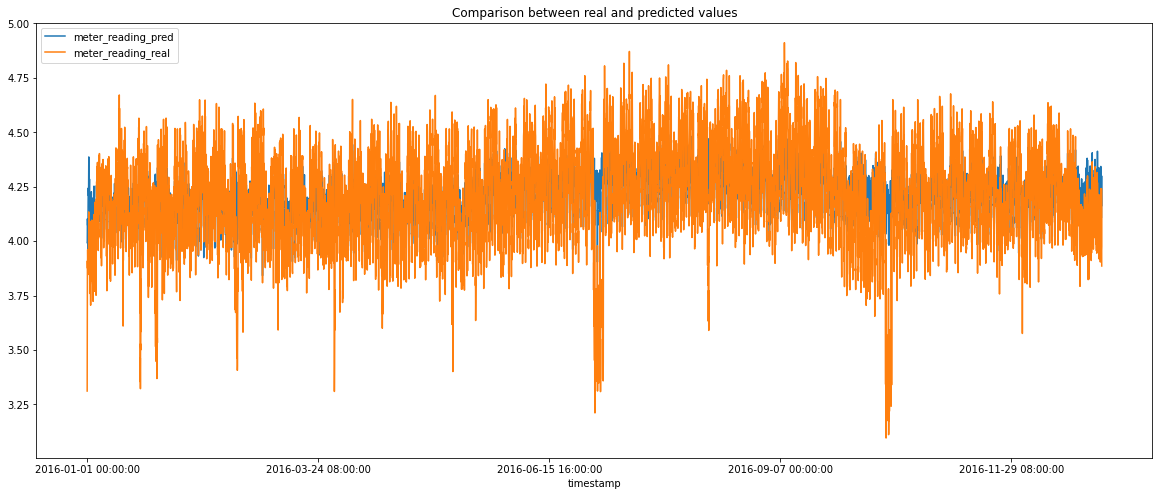

In [ ]:
y_mean_time_pred = y_mean_time_pred.groupby('timestamp').meter_reading_pred.mean()
y_mean_time_real = y_mean_time_real.groupby('timestamp').meter_reading_real.mean()
y_mean_time_pred.plot(figsize=(20, 8), )
y_mean_time_real.plot(figsize=(20, 8))
plt.title("Comparison between real and predicted values")
plt.legend(loc="upper left")

In [ ]:
# Model based on timestamp

In [ ]:
dataset_saved = reduce_mem_usage(dataset_saved)
df_train = dataset_saved.sort_values("timestamp")

Memory usage after optimization is: 586.41 MB
Decreased by 49.2%


In [ ]:
X_train = df_train[:int(df_train.shape[0]*8 / 10)].drop(["timestamp", "meter_reading"], 1)
X_test = df_train[int(df_train.shape[0]*8 / 10):].drop(["timestamp", "meter_reading"], 1)

test_timestamp = df_train[int(df_train.shape[0]*8 / 10):].timestamp

y_train = df_train[:int(df_train.shape[0]*8 / 10)].meter_reading
y_test =  df_train[int(df_train.shape[0]*8 / 10):].meter_reading


y_train = np.log1p(y_train)
y_test = np.log1p(y_test)



In [ ]:
# defining parameter range 
# Arrange kfold validation
# It takes too long time (over 2 hours). This is why we didnt use wide parameter range in this model.
# Probably, with better parameters, results might be better


parameters = {'n_estimators': [20,30],
                "learning_rate" : [0.05, 0.01],
                "boosting_type": ["gbdt"],
                "num_leaves": [20, 40],
                "reg_lambda": [2,3]
               }
cv = KFold(n_splits=10, shuffle=True, random_state=42) 

model = GridSearchCV(LGBMRegressor(), parameters, cv=cv, scoring='neg_root_mean_squared_error',
                        return_train_score=True)

model.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state...
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'boosting_type': ['gbdt'],
                         'learning_rate': [0.05, 0.01],
              

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.42472481586642485


In [ ]:
# Root Mean Sqaured Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred, squared = False))

1.5774960744202349


In [ ]:
# Mean Squared Error
print(mean_squared_error(y_test, y_pred, squared = True))

2.488493864811251


In [ ]:
dataset = pd.DataFrame()
dataset["meter_reading_real"] = y_test
dataset["timestamp"] = test_timestamp
dataset["meter_reading_pred"] = y_pred
dataset = dataset.reset_index().drop("index",1)

y_mean_time_real = dataset[["meter_reading_real", "timestamp"]]
y_mean_time_pred = dataset[["meter_reading_pred", "timestamp"]]

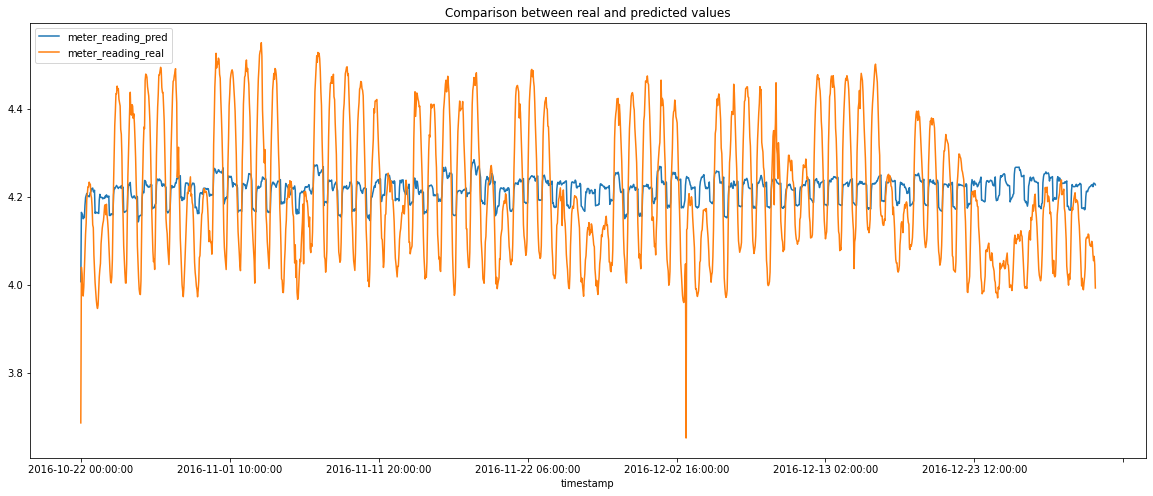

In [ ]:
y_mean_time_pred = y_mean_time_pred.groupby('timestamp').meter_reading_pred.mean()
y_mean_time_real = y_mean_time_real.groupby('timestamp').meter_reading_real.mean()
y_mean_time_pred.plot(figsize=(20, 8), )
y_mean_time_real.plot(figsize=(20, 8))
plt.title("Comparison between real and predicted values")
plt.legend(loc="upper left")